# ML Series - Linear Regression

Linear regression is a supervised machine learning algorithm used to model the linear relationship between a target variable (or dependent variable) and one or more independent variables. The goal of linear regression is to find the best-fit line that minimizes the sum of the squared differences between the predicted and actual values of the dependent variable.


In Statistical terms, regression models help us make predictions about the population based on sample data.

                                                     Variables
                                                     
                                               Target(or dependent): Y

                                             Independent: 𝑥1, 𝑥2, 𝑥3…𝑥𝑘

#### Simple linear regression model (population):
### Y = 𝛽0 + 𝛽1𝑥1 + 𝜀

1. Y – dependent variable. 
2. 𝑥1 - independent variable.
3. 𝛽0 (constant/intercept) - It is the constant term in the regression equation. It represents the predicted value of 𝑌 when the independent variable 𝑥1 is 0.
4. 𝛽1 (coefficient) – quantifies the effect of 𝑥1 on 𝑦,it shows how much 𝑌 is expected to change when 𝑥1 increases by one unit, holding all other variables constant.
5. 𝜀 (error of estimation) - Also known as the residual or disturbance term, represents the difference between the observed value of 𝑌 and the value predicted by the model. It accounts for the variation in 𝑌 that cannot be explained by the independent variable 𝑥1.
​

#### Simple linear regression equation (sample):
### 𝑦̂ = 𝑏0 + 𝑏1𝑥1

1. 𝑦̂ – target value
2. 𝑏0 – coefficient – estimate of 𝛽0
3. 𝑏1 – coefficient – estimate of 𝛽1
4. 𝑥1 – sample data for the independent variable
5. 𝜀 – error of estimation

### Geometrical representation of Linear regression model 

![Election](LR.png)

#### Regression line or the best fitting line through data points. ####



### Why Linear regression:

1. **Simplicity and interpretability**: It’s a relatively easy concept to understand and apply. The resulting simple linear regression model is a straightforward equation that shows how one variable affects another. This makes it easier to explain and trust the results compared to more complex models.
2. **Prediction**: Linear regression allows you to predict future values based on existing data. For instance, you can use it to predict sales based on marketing spend or house prices based on square footage.
3. **Foundation for other techniques**: It serves as a building block for many other data science and machine learning methods. Even complex algorithms often rely on linear regression as a starting point or for comparison purposes.


### Difference between regression and correlation

1. Correlation - measures the degree of relationship between two variables
2.  Regression - shows how one variable affects another or what changes it causes to the other

# Muliple Linear Regression in python

### Implenting basic libraries

In [1]:
# basic python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# advance libaries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Loading and describing data

Dataset Link - https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/notebook

In [113]:
df = pd.read_csv("advertising.csv")

In [7]:
df.shape

(200, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<Axes: >

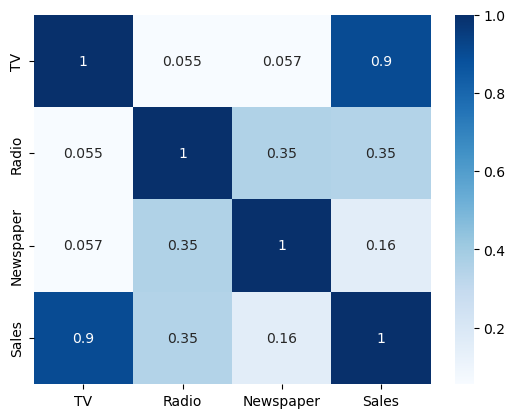

In [13]:
sns.heatmap(df.corr(),annot = True, cmap = "Blues", fmt= ".2g")

<Axes: >

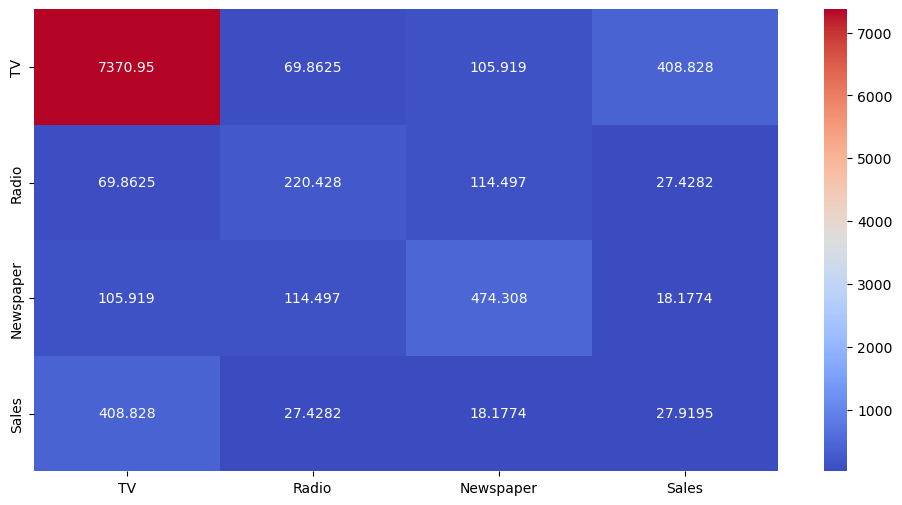

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df.cov(), annot = True, cmap ='coolwarm',fmt=".6g")

In [19]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Exploring the dataset

<Axes: >

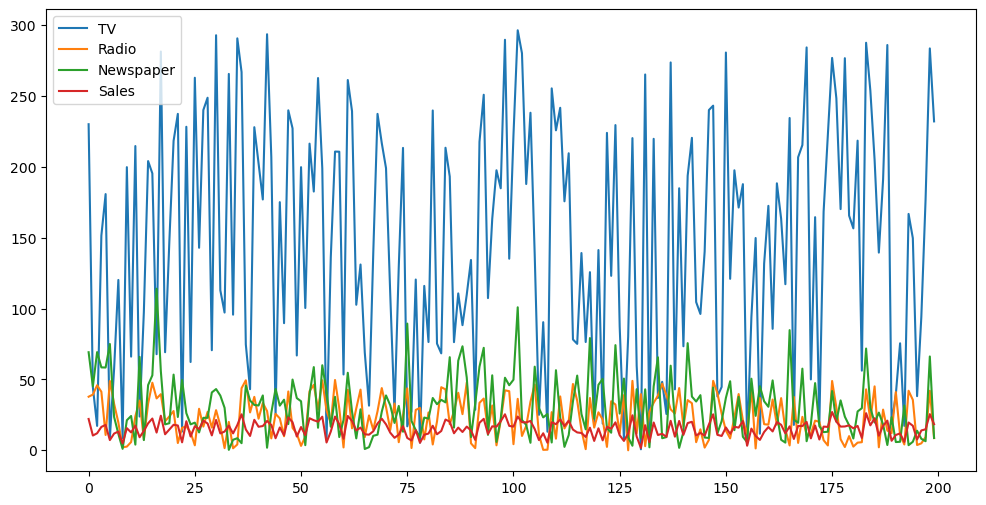

In [22]:
df.plot(figsize=(12, 6))

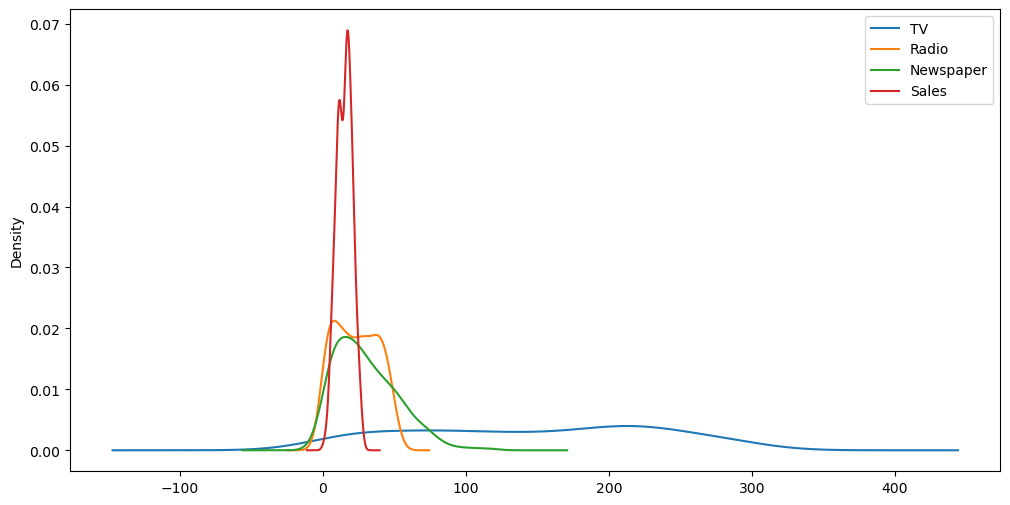

In [254]:
for i in df.columns: 
    df[i].plot.kde(figsize=(12,6))
    plt.legend()

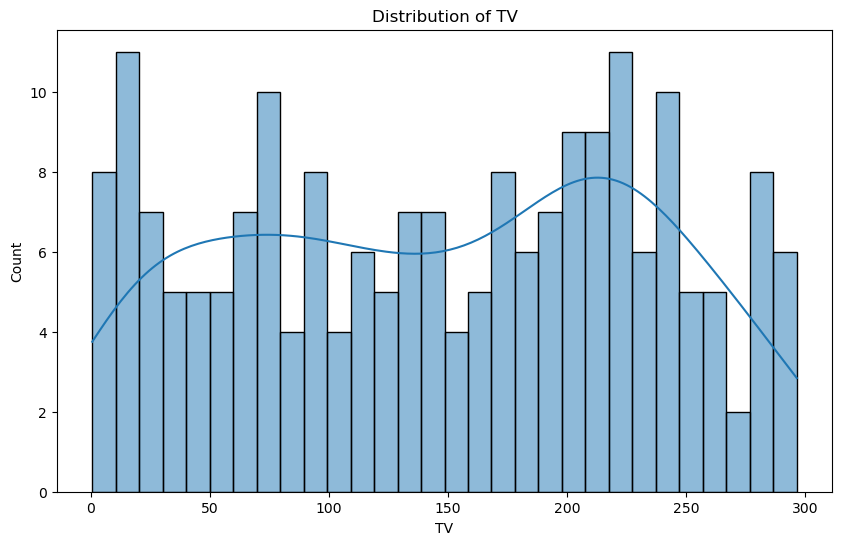

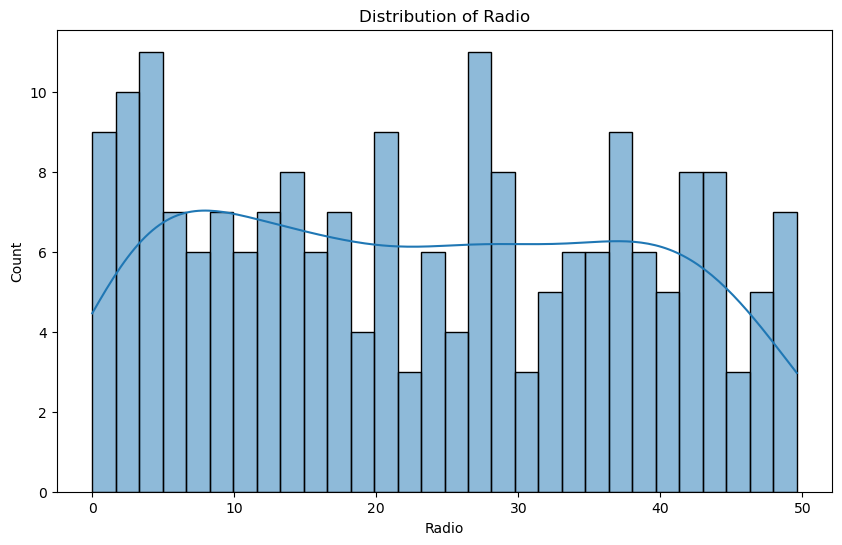

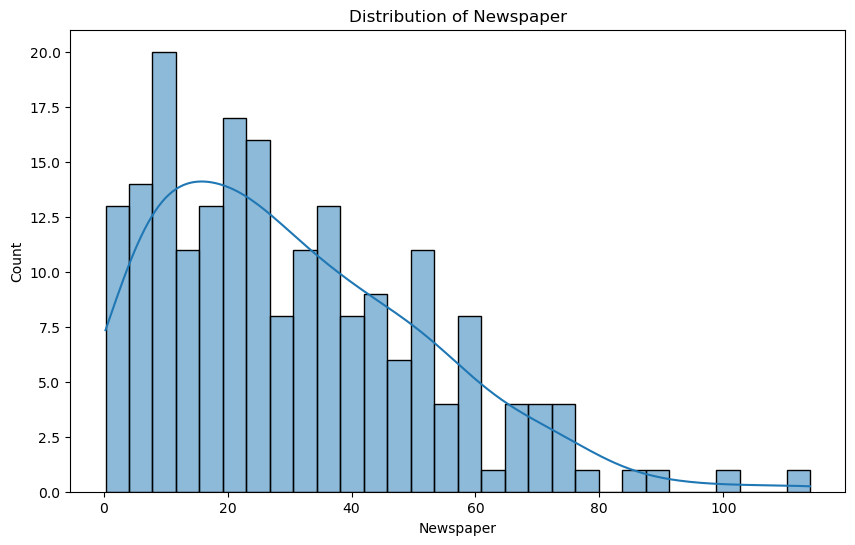

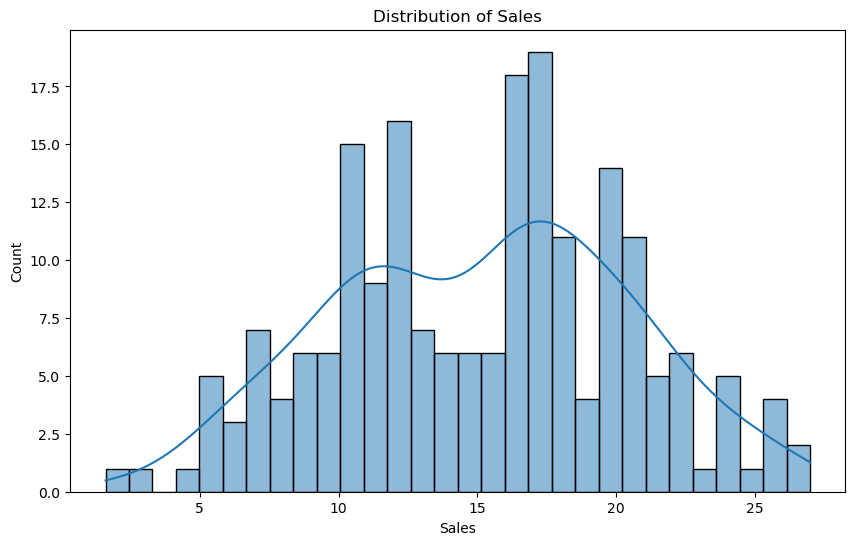

In [28]:
for i in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df, x=i, kde=True, bins=30)
    plt.title(f'Distribution of {i}')
    plt.show()   

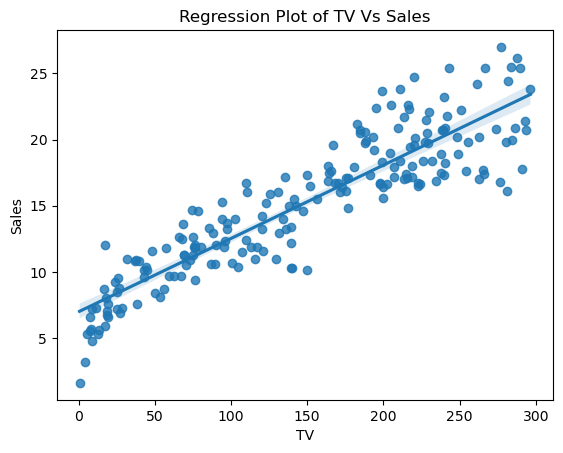

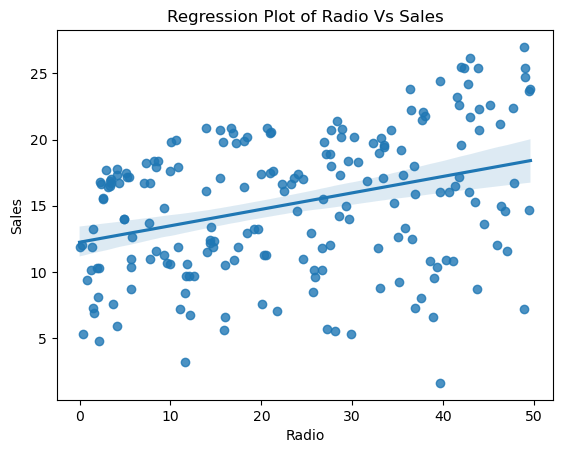

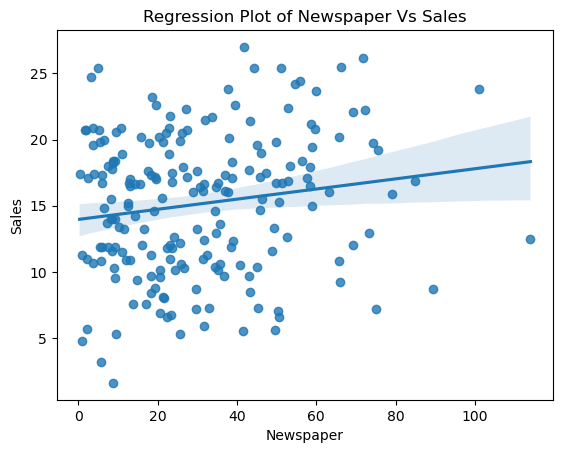

In [109]:
for i in df.columns:
    if i != 'Sales':
        sns.regplot(data = df, x=i, y ='Sales')
        plt.title(f'Regression Plot of {i} Vs Sales')
        plt.show()

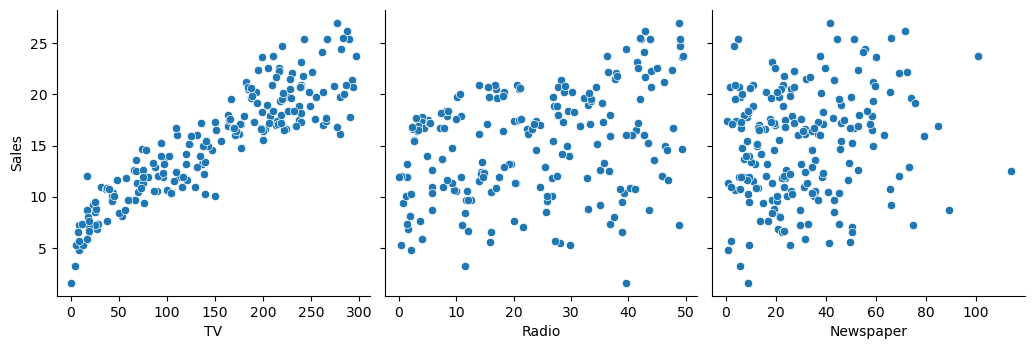

In [30]:
sns.pairplot(df, x_vars = ['TV','Radio','Newspaper'], y_vars = ['Sales'], kind = 'scatter',aspect=1, size = 3.5) 

<Axes: >

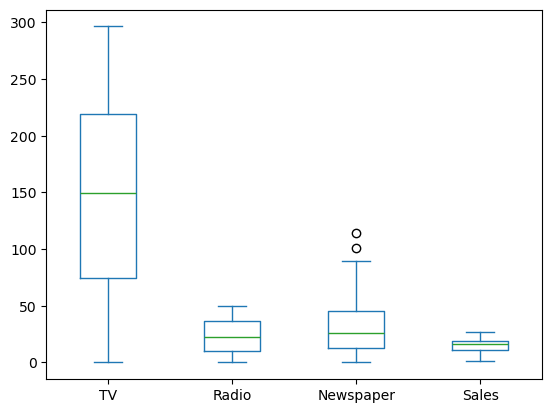

In [24]:
df.plot.box()

As we can see, there are outliers in the 'Newspaper' column. Let's remove these outliers from the dataset to make it more accurate and reliable

In [416]:
Q1 = df.quantile(0.25) # define first quartile
Q3 = df.quantile(0.75) # define third quartile
IQR = Q3 - Q1 #calculating IQR
df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))] # defining df1 with removing outlier from df

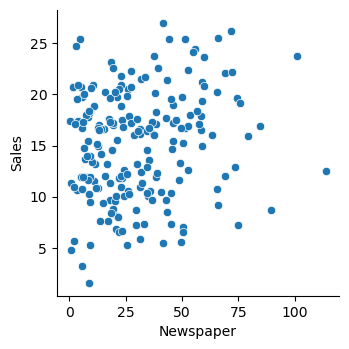

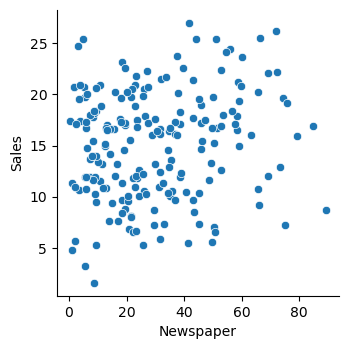

In [34]:
# Compairison of Newspaper column with with outlier and witout outlier
sns.pairplot(df, x_vars = ['Newspaper'], y_vars = ['Sales'], kind = 'scatter',aspect=1, size = 3.5)
sns.pairplot(df1, x_vars = ['Newspaper'], y_vars = ['Sales'], kind = 'scatter',aspect=1, size = 3.5)

In [36]:
df1['Newspaper'].equals(df['Newspaper']) #checking weather df1(with no outlier) is equal is df(with outlier)

False

### Customizing preprocessing

In [39]:
df1 = df1.dropna()

In [41]:
df1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Deifining X and y varaible as independent and dependent variable.

In [117]:
X = df1.drop(['Sales'],axis=1) # independent variable
y = df1['Sales'] # dependent variable

#### Deviding data into train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42) # with test_size = 20 %

# Building the linear regression model from sklearn

In [121]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(fit_intercept=True, positive = True)
lr_model.fit(X_train, y_train)

LinearRegression(positive=True)

#### Predicting dependent value in terms of testing value

In [125]:
y_pred = lr_model.predict(X_test)
y_pred

array([ 8.82481623, 13.77055468, 24.22481723, 11.10056512,  9.32009201,
       21.48456053, 20.15850056, 12.76167515, 15.12881886, 21.08287367,
       15.98934888, 20.38088326,  8.16535464, 14.03642672,  8.9375406 ,
       10.73054602,  9.35201578, 15.82574293,  9.79573284, 11.63821168,
       12.60519985, 17.21866213, 23.44516693,  7.02979947, 18.7214195 ,
       20.9597909 ,  8.20661353, 18.25399281,  7.45331361, 14.85839901,
       18.74710884, 14.11078068,  9.01994517, 13.07559033, 19.30878714,
       17.89362267, 16.88640389, 14.52324791, 19.60537819, 17.74576003])

#### Best fit line for acrtual test value vs predicted value  

Best Fit Line  - In simple terms, the best-fit line is a line that best fits the given scatter plot(i.e. y_test). 
Mathematically, you obtain the best-fit line by minimizing the Residual Sum of Squares (RSS).

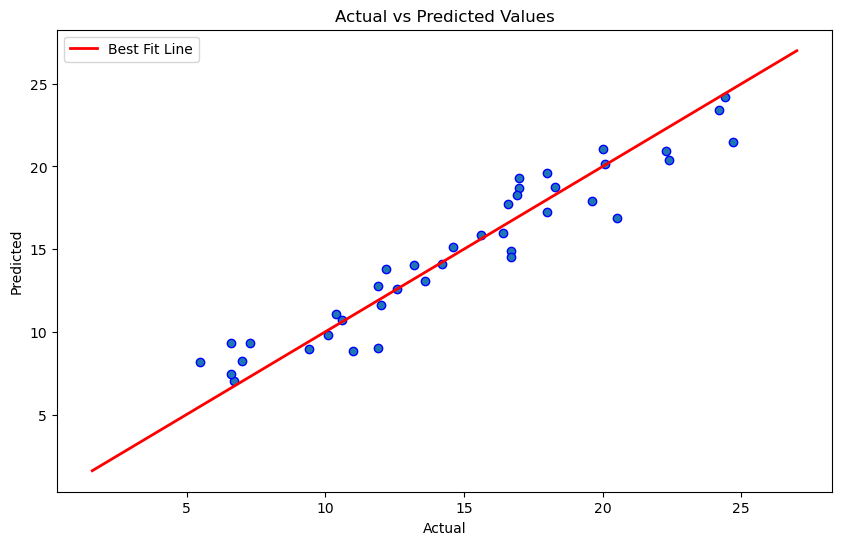

In [293]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r', lw=2, label = "Best Fit Line") #xlim, ylim, color, linewidth, label
plt.legend(loc=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

#### Checking the coefficients of independent varibale with dependent varaible by keeping all variables constant

In [244]:
for i, col in enumerate(X.columns):
    if i != 'Sales':
        print(f'The coefficient of {col} is: {lr_model.coef_[i+1]:.16f}')

The coefficient of TV is: 0.0539592475959363
The coefficient of Radio is: 0.1010151220694665
The coefficient of Newspaper is: 0.0074693692578945


#### Gettting the intercept - constant term which indicates the value of dependent varibale when independent variable is at 0.

In [242]:
print("The y intercept is : ", lr_model.intercept_)

The y intercept is :  4.623695319484105


#### Getting various evaluation metrics (we did not calculate MAE, which is robust to outliers, because the outliers were already removed from the dataset)."

In [250]:
print('MSE of LR_model:', mean_squared_error(y_test, y_pred))
print("RMSE for LR_model: ",np.sqrt( mean_squared_error(y_test, y_pred)))
print("R-squared for LR_model: ",r2_score( y_test, y_pred ))

MSE of LR_model: 2.415728945593508
RMSE for LR_model:  1.5542615434969458
R-squared for LR_model:  0.9130003152798273


#### Predicting the value for new unseen data

In [418]:
user_input = {'const': 1, 
              'TV': float(input("Enter value for TV: ")),
              'Radio': float(input("Enter value for Radio: ")),
              'Newspaper': float(input("Enter value for Newspaper: "))}

user_data = pd.DataFrame([user_input])
print(user_data)
new_prediction = lr_model.predict(user_data)
print("Predicted response value:", new_prediction[0])

Enter value for TV:  178.9
Enter value for Radio:  68.7
Enter value for Newspaper:  59.4


   const     TV  Radio  Newspaper
0      1  178.9   68.7       59.4
Predicted response value: 21.660424134488395


### Assumption in Linear Regression

1. **Linearity of residuals**: There needs to be a linear relationship between the dependent variable and independent variable(s).
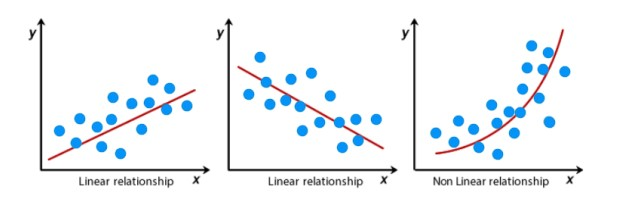

2. **Independence of residuals**: The error terms should not be dependent on one another (like in time-series data wherein the next value is dependent on the previous one). There should be no correlation between the residual terms. The absence of this phenomenon is known as Autocorrelation.
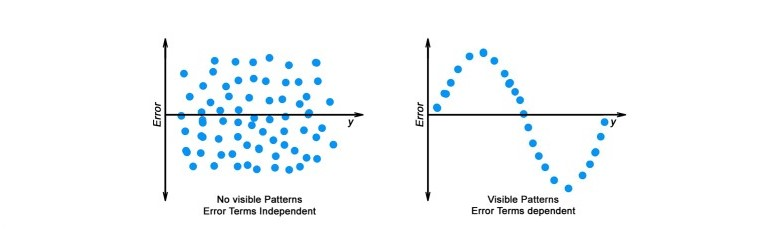

3. **Normal distribution of residuals**: The mean of residuals should follow a normal distribution with a mean equal to zero or close to zero. This is done to check whether the selected line is the line of best fit or not. If the error terms are non-normally distributed, suggests that there are a few unusual data points that must be studied closely to make a better model.
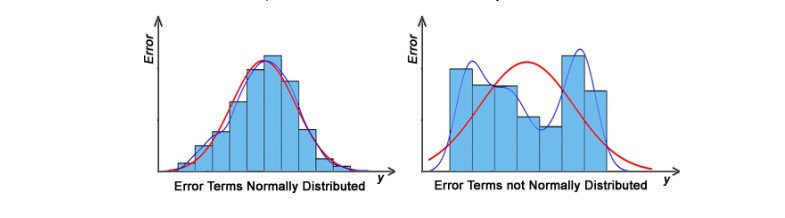

4. **The equal variance of residuals**: The error terms must have constant variance. This phenomenon is known as Homoscedasticity. The presence of non-constant variance in the error terms is referred to as Heteroscedasticity. Generally, non-constant variance arises in the presence of outliers or extreme leverage values.
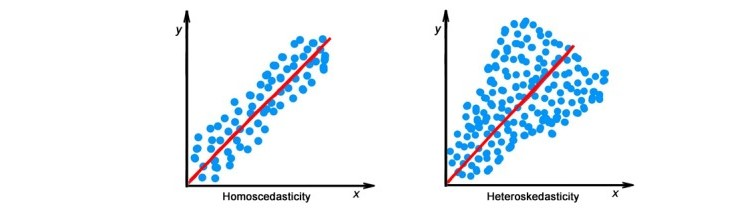

5. **Overfitting**: When more and more variables are added to a model, the model may become far too complex and usually ends up memorizing all the data points in the training set. This phenomenon is known as the overfitting of a model. This usually leads to high training accuracy and very low test accuracy.
6. **Multicollinearity**: It is the phenomenon where a model with several independent variables, may have some variables interrelated.
7. **Feature Selection**: With more variables present, selecting the optimal set of predictors from the pool of given features (many of which might be redundant) becomes an important task for building a relevant and better model.

Reference Link - https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/

# Building Linear regression using OLS Model

OLS or the ordinary least squares is the most common method to do estimate of the linear regression equation. “Least squares” stands for the minimum squares error, or SSE. This method aims to find the line, which minimizes the sum of the squared errors.

In [326]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train) # adding constant or intercept to X_train 
sm_model = sm.OLS(y_train, X_train).fit() # building model by fitting y_train and X_train 

#### Getting parameters of OLS Model

In [330]:
sm_model.params

const        4.623695
TV           0.053959
Radio        0.101015
Newspaper    0.007469
dtype: float64

In [332]:
w0 = sm_model.params[0]  # Intercept
w1, w2, w3 = sm_model.params[1], sm_model.params[2], sm_model.params[3] # Coefficients

In [334]:
print(f'Intecept of statsmodel : {w0}')
print(f'Coefficients of Features of statsmodel : {w1, w2, w3}')

Intecept of statsmodel : 4.6236953194840655
Coefficients of Features of statsmodel : (0.053959247595936476, 0.10101512206946696, 0.007469369257894682)


In [336]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           7.30e-76
Time:                        23:14:40   Log-Likelihood:                -306.46
No. Observations:                 158   AIC:                             620.9
Df Residuals:                     154   BIC:                             633.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6237      0.354     13.070      0.0

In [338]:
X_test = sm.add_constant(X_test)
y_pred = sm_model.predict(X_test)

In [340]:
y_pred

66      8.824816
116    13.770555
17     24.224817
143    11.100565
158     9.320092
128    21.484561
142    20.158501
31     12.761675
19     15.128819
169    21.082874
160    15.989349
15     20.380883
56      8.165355
57     14.036427
117     8.937541
46     10.730546
126     9.352016
9      15.825743
149     9.795733
86     11.638212
115    12.605200
163    17.218662
61     23.445167
189     7.029799
74     18.721419
69     20.959791
121     8.206614
165    18.253993
119     7.453314
177    14.858399
70     18.747109
77     14.110781
127     9.019945
83     13.075590
25     19.308787
193    17.893623
97     16.886404
173    14.523248
20     19.605378
152    17.745760
dtype: float64

#### Getting Best Fit Line for OLS based Linear regression

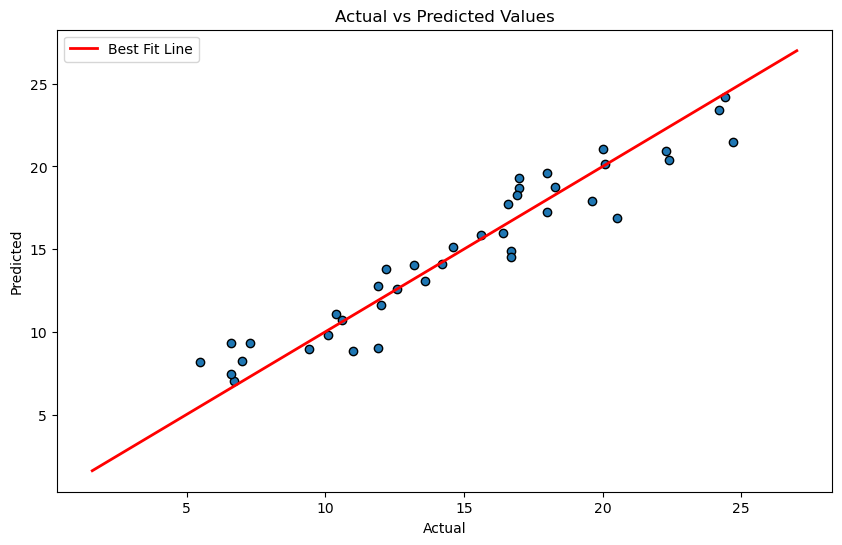

In [350]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r', lw=2, label = "Best Fit Line")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend(loc=2)
plt.show()

#### **Getting Partial Regression Plot**-  Which is useful for understanding the relationships between individual predictor variables and the target variable in the context of a multiple regression model.

Partial regression plots are useful for:
1. **Understanding Relationships**: They help visualize the unique contribution of each predictor variable to the target variable, independent of other predictors.
2. **Detecting Multicollinearity**: They can reveal if any predictor variables are collinear with others, which might indicate multicollinearity issues.
3. **Diagnosing Model Issues**: These plots can help in diagnosing issues with the regression model by showing how well each predictor is explaining the variation in the target variable.

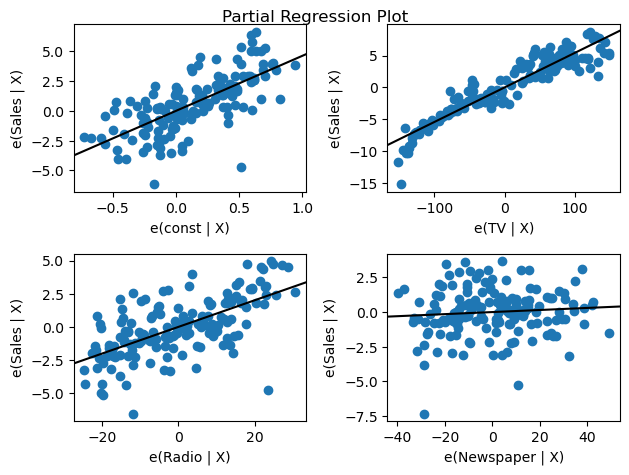

<Figure size 1000x800 with 0 Axes>

In [354]:
import statsmodels.graphics.api as smg
smg.plot_partregress_grid(sm_model)
plt.figure(figsize=(10,8))
plt.show()

#### Visualizaing the regressiong in 3d plane

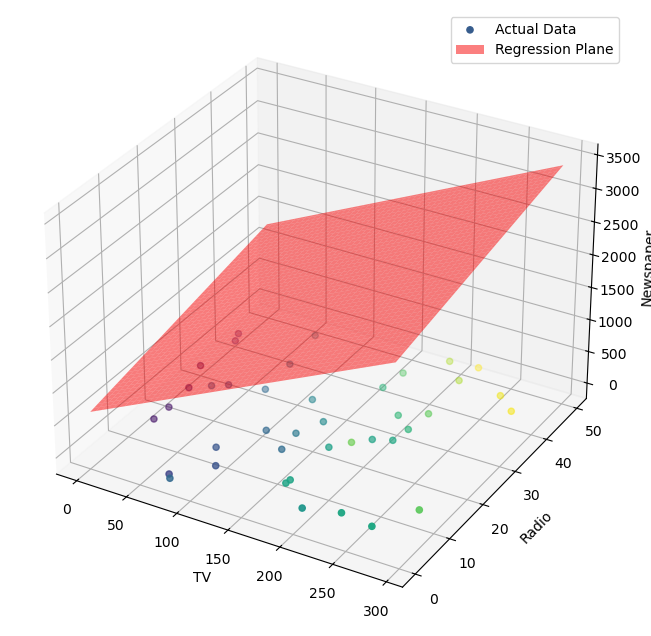

In [408]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the actual data
ax.scatter(X_test['TV'], X_test['Radio'], X_test['Newspaper'], c=y_test, marker='o', label='Actual Data')

# Create a grid for the surface plot
x1_range = np.linspace(X_train['TV'].min(), X_train['TV'].max(), 100)
x2_range = np.linspace(X_train['Radio'].min(), X_train['Radio'].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)
x3 = (sm_model.params[0] + sm_model.params[1] * x1 + sm_model.params[2] * x2) / sm_model.params[3]  # Solve for x3

# Plot the surface
ax.plot_surface(x1, x2, x3, alpha=0.5, color='r', label='Regression Plane')

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Newspaper')

cbar = plt.colorbar(sc)
cbar.set_label('Sales')


plt.legend()
plt.show()

#### Predicting the sales price in unseen data

In [420]:
user_input = {'const': 1,  # Add constant term manually
              'TV': float(input("Enter value for TV: ")),
              'Radio': float(input("Enter value for Radio: ")),
              'Newspaper': float(input("Enter value for Newspaper: "))}

user_df = pd.DataFrame([user_input])
print(user_df)
predicted_y = sm_model.predict(user_df)

print(f"Predicted value of Sales: {predicted_y[0]}")

Enter value for TV:  178.9
Enter value for Radio:  67.9
Enter value for Newspaper:  56.4


   const     TV  Radio  Newspaper
0      1  178.9   67.9       56.4
Predicted value of Sales: 21.557203929059167
